### **Лабораторная работа по параболическим уравнениям**

In [101]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [102]:
def u_0_x (x):
    return((1+x)**(4/3)/25**(1/3))
def u_t_0(t):
    return((5-14*t/3)**(-2/3))
def u_t_1(t):
    return(16**(1/3)*(5-14*t/3)**(-2/3))
N = 10
h = 1/N
tau = 1/N

In [103]:
u = np.zeros([N, N]) 

In [104]:
time = [0]*N
coord = [0]*N
for i in range(N):
    time[i] = i * tau
    coord[i] = i * h
    u[0][i]=u_0_x(coord[i])
    u[i][0]=u_t_0(time[i])
    u[i][N-1] = u_t_1(time[i])

In [105]:
ppp = u.copy()

In [106]:

def a(x):
    return(x**(3/2))

In [107]:
#функция считает значение на I+1 слое
def work(I):
    #считаю ашки (a = u^3/2)
    w = u[I].copy()
    a_pl_half=[0]*(N-2)
    a_mn_half=[0]*(N-2)
    for i in range(N-2):
        a_pl_half[i]=0.5*(a(w[i+1]) + a(w[i+2]))

    for i in range(N-2):
        a_mn_half[i]=0.5*(a(w[i+1]) + a(w[i]))
    #строю 3х-диагональную матрицу
    A = [] 
    for i in range(N-2): 
        A.append([0] * (N-2) )
    norm = 4;
    while(norm > 0.01):
        #A = #это матрица n-2 на n-2, тк унас столько неизвестных(на краях есть значения уже)
        A[0][0] = - a_pl_half[0] / h**2 - a_mn_half[0] / h**2 - 1/tau;
        A[0][1]=  a_pl_half[0] / h**2
        A[N-3][N-4]= a_mn_half[N-3] / h**2
        A[N-3][N-3] = - a_pl_half[N-3] / h**2 - a_mn_half[N-3] / h**2 - 1/tau;
        j=0;
        for i in range(N-4):
           
                A[i+1][j] = a_mn_half[i+1] / h**2
                A[i+1][j+1]= - a_pl_half[i+1] / h**2 - a_mn_half[i+1] / h**2 - 1/tau;
                A[i+1][j+2] = a_mn_half[i+1] / h**2
                j=j+1;
     
        b= [0]*(N-2)
        for i in range(N-2):
            b[i] = -((u[I])[i+1])/tau        
        res= np.linalg.solve(A,b)
        #получила результат очередной итерации
       
        res_this_iter= u[I+1].copy();
        prev_res = w.copy();
        for i in range(N-2):
            res_this_iter[i+1]=res[i].copy()
        # получила целый слой с итерации (добавила границы, которые не задействовала при расчете в итерациях)   
        # теперь меняю ашки , чтобы использовать их на следующей итерации
        for i in range(N-2):
            a_pl_half [i]= 0.5 * ((prev_res[i+1])**(3/2) + 3/2 * (prev_res[i+1])**(1/2) * (res_this_iter[i+1] - prev_res[i+1]) + (prev_res[i+2])**(3/2) + 3/2 * (prev_res[i+2])**(1/2) * (res_this_iter[i+2] - prev_res[i+2]))
            a_mn_half[i] = 0.5 * ((prev_res[i+1])**(3/2) + 3/2 * (prev_res[i+1])**(1/2) * (res_this_iter[i+1] - prev_res[i+1]) + (prev_res[i])**(3/2) + 3/2 * (prev_res[i])**(1/2) * (res_this_iter[i] - prev_res[i]))
        
        norm=0;
        for i in range(N):
            norm=norm + abs(res_this_iter[i] - prev_res[i])
        #отправляю на следующую итерацию значение слоя на этой итерации    
        w = res_this_iter.copy();
    
    return(w)    

In [108]:
#заполняю всю сетку
for i in range(N-1):
    u[i+1]=work(i)


In [109]:
print(u)

[[3.41995189e-01 3.88338317e-01 4.36108942e-01 4.85226450e-01
  5.35620731e-01 5.87230146e-01 6.40000000e-01 6.93881367e-01
  7.48830176e-01 8.04806481e-01]
 [3.65080159e-01 1.90007659e-01 2.70518562e-01 3.27484024e-01
  3.74122407e-01 4.15421805e-01 4.51451844e-01 4.47727269e-01
  2.07654855e-01 9.19944354e-01]
 [3.92501164e-01 9.83254883e-02 1.81110943e-01 2.35246716e-01
  2.77667578e-01 3.14225635e-01 3.43230104e-01 3.18491851e-01
  7.51110977e-02 9.89040958e-01]
 [4.25727462e-01 4.97689294e-02 1.29823353e-01 1.79408282e-01
  2.18484929e-01 2.51472457e-01 2.75688643e-01 2.45386027e-01
  3.19824032e-02 1.07276598e+00]
 [4.67012961e-01 2.40450174e-02 9.94056186e-02 1.43803629e-01
  1.78846453e-01 2.08381691e-01 2.29683757e-01 1.99761517e-01
  1.56577429e-02 1.17679892e+00]
 [5.20020956e-01 1.11726952e-02 7.99478880e-02 1.19638299e-01
  1.51140910e-01 1.77833921e-01 1.96928143e-01 1.68993634e-01
  8.45984896e-03 1.31037070e+00]
 [5.91177930e-01 5.09192521e-03 6.67151379e-02 1.02348710e

In [110]:
def plot(u, title):
    matr = np.asarray(u)
    x = np.linspace(0, 1/N, N) 
    y = np.linspace(0, 1/N, N) 
    x, y = np.meshgrid(x, y) 

    #create 3d axes
    fig = plt.figure(figsize=(10, 10))
    graph = plt.axes(projection='3d')

    surf = graph.plot_surface(x, y, matr, cmap=cm.plasma)
    graph.set_xlabel("x", fontsize=20)
    graph.set_ylabel("t", fontsize=20)

    graph.set_zlabel("u(x, t)", fontsize=20)

    fig.colorbar(surf, shrink=0.5)

    plt.grid()
    plt.title(title)
    plt.show()


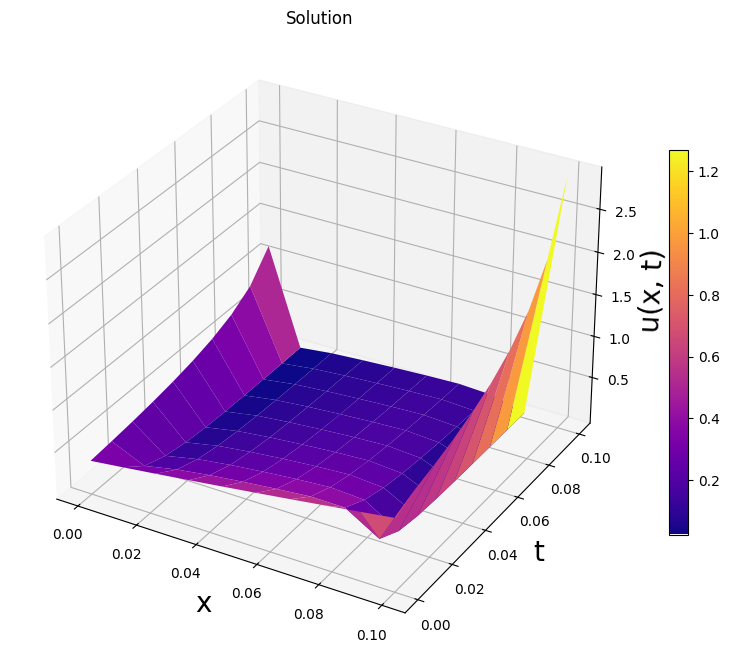

In [111]:
plot(u, "Solution")

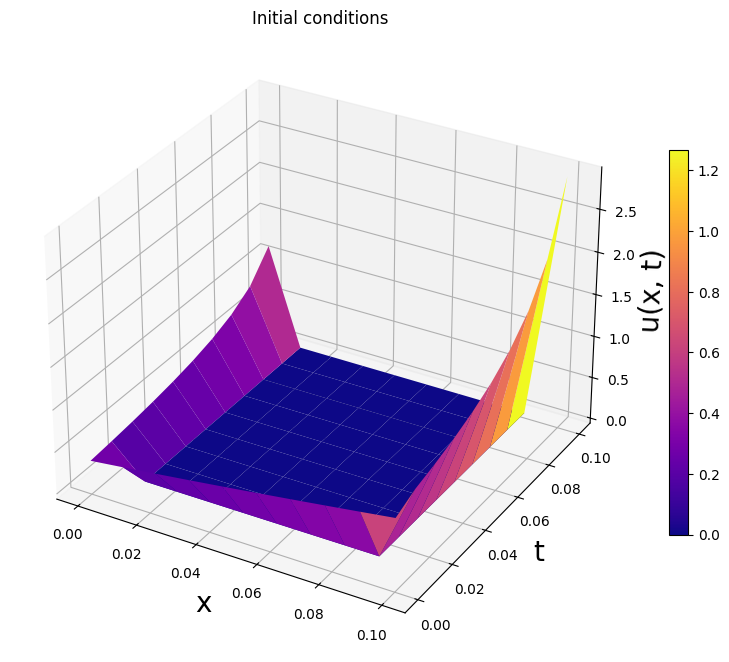

In [112]:
plot(ppp,"Initial conditions")

Все:)